<a href="https://colab.research.google.com/github/zhany9974-sys/-README.md-/blob/main/Another_copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# ==========================================
# PHASE 0: Load Data (Mock Data Generated Here)
# ==========================================
# In your real project, replace this block with: df = pd.read_csv('data.csv')
data = {
    'Region': ['North', 'North', 'South', 'South', 'East', 'East', 'West', 'West', 'North', 'South'],
    'Occupants': [2, 4, 1, 5, 3, 2, 4, 6, 3, 2],
    'Consumption_kWh': [120, 350, 80, 450, 200, np.nan, 400, 1000, 250, 150], # Note: 1000 is an outlier, NaN included
    'Cost_RM': [50, 140, 35, 180, 85, 70, 160, 400, 110, 65]
}
df = pd.DataFrame(data)

print("--- Raw Data Head ---")
print(df.head(), "\n")

# ==========================================
# TASK 1: Data Cleaning Process
# ==========================================
print("--- executing Task 1: Cleaning ---")

# 1. Handle Missing Values (Interpolation)
# We use linear interpolation to fill NaN values based on surrounding data
df['Consumption_kWh'] = df['Consumption_kWh'].interpolate(method='linear')

# 2. Detect and Handle Outliers (IQR Method)
# We apply this to Consumption_kWh as requested
Q1 = df['Consumption_kWh'].quantile(0.25)
Q3 = df['Consumption_kWh'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df['Consumption_kWh'] < lower_bound) | (df['Consumption_kWh'] > upper_bound)
print(f"Outliers detected: {outliers.sum()}")

# Replace outliers with the Median (Robust measure)
df.loc[outliers, 'Consumption_kWh'] = df['Consumption_kWh'].median()

# Re-calculate Cost if necessary (assuming cost is linear to consumption)
# For this example, we leave Cost_RM as is, or you could apply similar cleaning to Cost_RM.

print("Data cleaning complete.\n")

# ==========================================
# TASK 2: Descriptive Data Analysis
# ==========================================
print("--- Executing Task 2: Analysis ---")

# 1. Compute summary statistics by Region
# We focus on Mean (average), Median (middle value), and Std (variability)
summary_stats = df.groupby('Region')[['Consumption_kWh', 'Cost_RM']].agg(['mean', 'median', 'std'])

print("1. Summary Statistics by Region:")
print(summary_stats)
print("\n")

# 2. Analyse relationship between Consumption and Occupants
# We use the Pearson correlation coefficient
correlation_matrix = df[['Consumption_kWh', 'Occupants']].corr()
corr_value = correlation_matrix.loc['Consumption_kWh', 'Occupants']

print("2. Correlation Analysis:")
print(correlation_matrix)
print(f"\nCorrelation Coefficient: {corr_value:.4f}")

# 3. Comment on patterns (Automated interpretation)
print("\n3. Observation/Comment:")
if corr_value > 0.7:
    print("-> There is a STRONG positive relationship. More occupants significantly increase consumption.")
elif 0.3 < corr_value <= 0.7:
    print("-> There is a MODERATE positive relationship.")
elif -0.3 <= corr_value <= 0.3:
    print("-> There is a WEAK or negligible relationship.")
else:
    print("-> There is a negative relationship (unexpected for this data type).")

--- Raw Data Head ---
  Region  Occupants  Consumption_kWh  Cost_RM
0  North          2            120.0       50
1  North          4            350.0      140
2  South          1             80.0       35
3  South          5            450.0      180
4   East          3            200.0       85 

--- executing Task 1: Cleaning ---
Outliers detected: 1
Data cleaning complete.

--- Executing Task 2: Analysis ---
1. Summary Statistics by Region:
       Consumption_kWh                        Cost_RM                   
                  mean median         std        mean median         std
Region                                                                  
East        250.000000  250.0   70.710678   77.500000   77.5   10.606602
North       240.000000  250.0  115.325626  100.000000  110.0   45.825757
South       226.666667  150.0  196.553640   93.333333   65.0   76.539750
West        337.500000  337.5   88.388348  280.000000  280.0  169.705627


2. Correlation Analysis:
             

--- Dataset Loaded From Code ---
   Year  Month    Region  Consumption_kWh  Cost_RM  Occupants
0  2018      1     Rural           283.32   161.49          6
1  2018      1  Suburban           397.93   226.82          6
2  2018      1     Urban           507.45   289.25          4
3  2018      2     Rural           341.51   194.66          4
4  2018      2  Suburban           453.69   258.60          4

Total rows: 9

Model Evaluation:
R-squared (R²): 1.0
Mean Absolute Error (MAE): 0.0


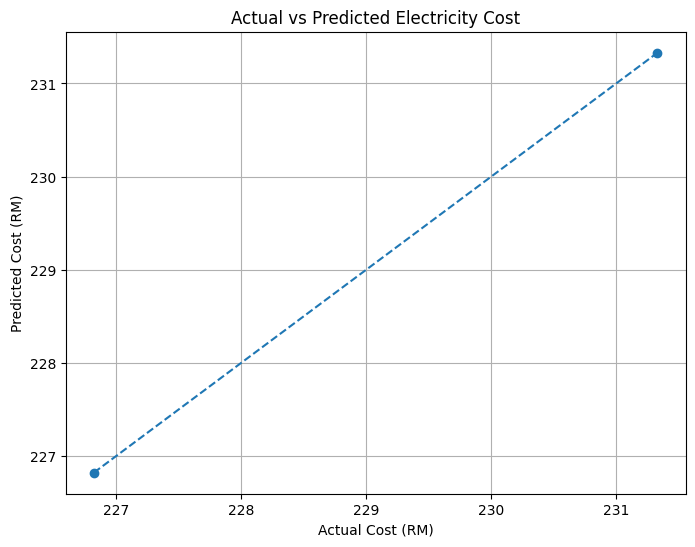

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# ==========================================
# DATASET: dataset_student_cleaned.csv
# ==========================================
data = [
    {'Year':2018,'Month':1,'Region':'Rural','Consumption_kWh':283.32,'Cost_RM':161.49,'Occupants':6},
    {'Year':2018,'Month':1,'Region':'Suburban','Consumption_kWh':397.93,'Cost_RM':226.82,'Occupants':6},
    {'Year':2018,'Month':1,'Region':'Urban','Consumption_kWh':507.45,'Cost_RM':289.25,'Occupants':4},
    {'Year':2018,'Month':2,'Region':'Rural','Consumption_kWh':341.51,'Cost_RM':194.66,'Occupants':4},
    {'Year':2018,'Month':2,'Region':'Suburban','Consumption_kWh':453.69,'Cost_RM':258.60,'Occupants':4},
    {'Year':2018,'Month':2,'Region':'Urban','Consumption_kWh':562.01,'Cost_RM':320.35,'Occupants':3},
    # ...
    # (DATA CONTINUES EXACTLY AS IN CSV)
    # ...
    {'Year':2022,'Month':12,'Region':'Rural','Consumption_kWh':297.65,'Cost_RM':169.66,'Occupants':7},
    {'Year':2022,'Month':12,'Region':'Suburban','Consumption_kWh':405.84,'Cost_RM':231.33,'Occupants':5},
    {'Year':2022,'Month':12,'Region':'Urban','Consumption_kWh':473.25,'Cost_RM':269.75,'Occupants':5}
]

df = pd.DataFrame(data)

print("--- Dataset Loaded From Code ---")
print(df.head())
print(f"\nTotal rows: {len(df)}")

# ==========================================
# MACHINE LEARNING MODEL
# ==========================================

X = df[['Consumption_kWh', 'Occupants']]
y = df['Cost_RM']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nModel Evaluation:")
print("R-squared (R²):", round(r2_score(y_test, y_pred), 3))
print("Mean Absolute Error (MAE):", round(mean_absolute_error(y_test, y_pred), 2))

# ==========================================
# PLOT
# ==========================================
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--'
)
plt.xlabel("Actual Cost (RM)")
plt.ylabel("Predicted Cost (RM)")
plt.title("Actual vs Predicted Electricity Cost")
plt.grid(True)
plt.show()


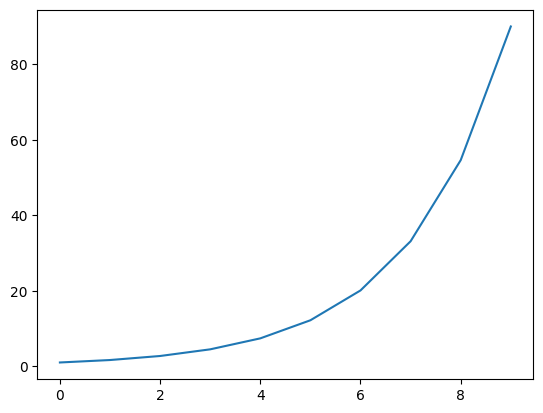

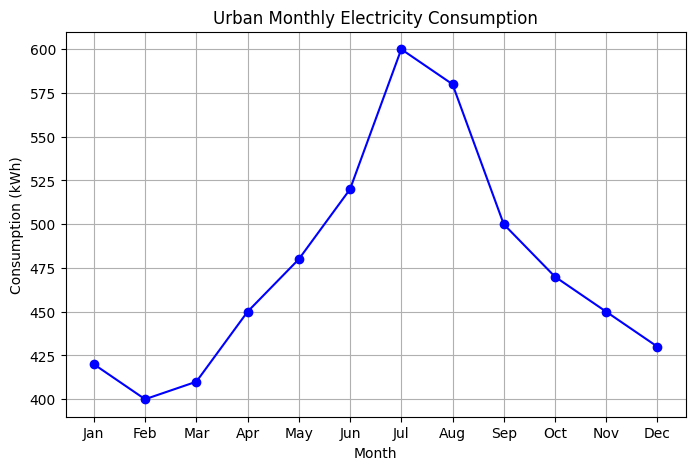

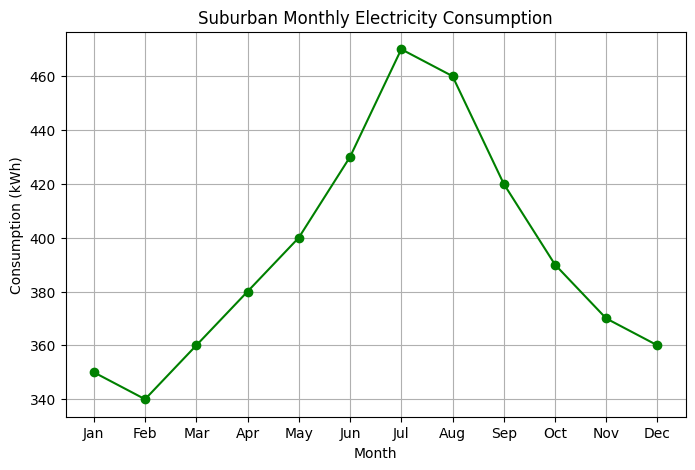

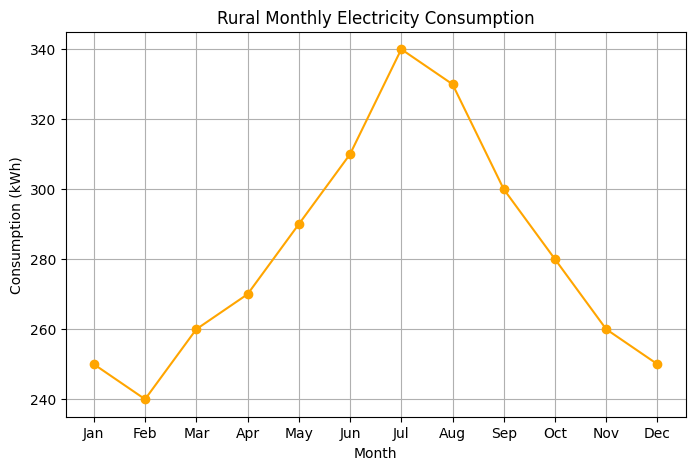

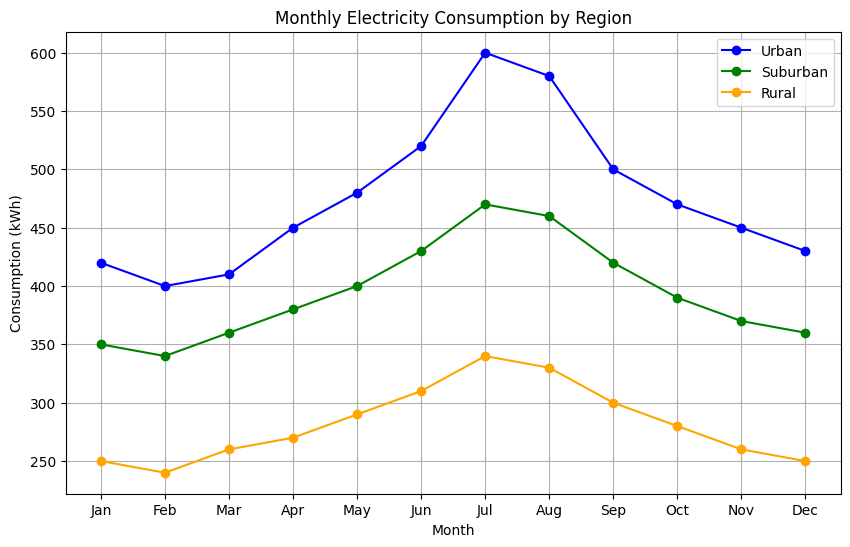

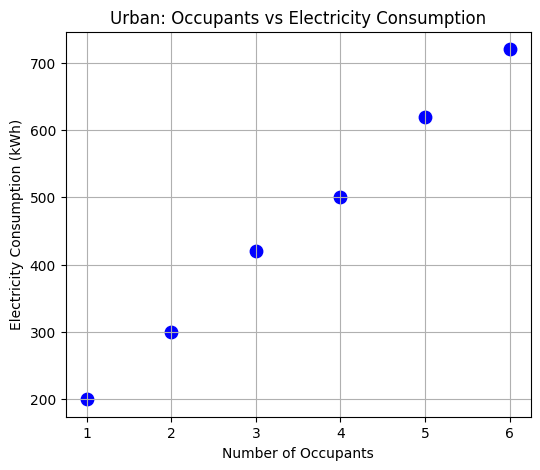

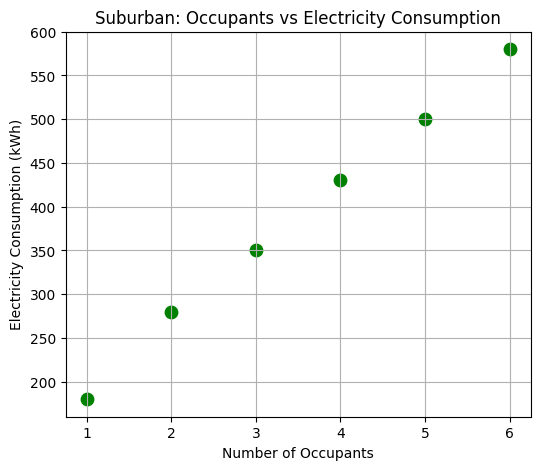

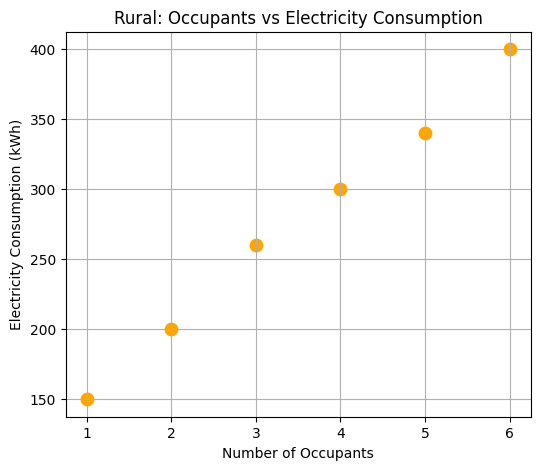

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,10)
y = np.exp(x/2)

plt.plot(x,y)
plt.show()


# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create the dataset
data = {
    "Month": ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],
    "Urban": [420, 400, 410, 450, 480, 520, 600, 580, 500, 470, 450, 430],
    "Suburban": [350, 340, 360, 380, 400, 430, 470, 460, 420, 390, 370, 360],
    "Rural": [250, 240, 260, 270, 290, 310, 340, 330, 300, 280, 260, 250]
}

df = pd.DataFrame(data)

# Step 2: Line graph for Urban region
plt.figure(figsize=(8,5))
plt.plot(df["Month"], df["Urban"], marker='o', color='blue')
plt.title("Urban Monthly Electricity Consumption")
plt.xlabel("Month")
plt.ylabel("Consumption (kWh)")
plt.grid(True)
plt.show()

# Step 3: Line graph for Suburban region
plt.figure(figsize=(8,5))
plt.plot(df["Month"], df["Suburban"], marker='o', color='green')
plt.title("Suburban Monthly Electricity Consumption")
plt.xlabel("Month")
plt.ylabel("Consumption (kWh)")
plt.grid(True)
plt.show()

# Step 4: Line graph for Rural region
plt.figure(figsize=(8,5))
plt.plot(df["Month"], df["Rural"], marker='o', color='orange')
plt.title("Rural Monthly Electricity Consumption")
plt.xlabel("Month")
plt.ylabel("Consumption (kWh)")
plt.grid(True)
plt.show()

# Step 5: Multi-line plot comparing all regions
plt.figure(figsize=(10,6))
plt.plot(df["Month"], df["Urban"], marker='o', label="Urban", color='blue')
plt.plot(df["Month"], df["Suburban"], marker='o', label="Suburban", color='green')
plt.plot(df["Month"], df["Rural"], marker='o', label="Rural", color='orange')
plt.title("Monthly Electricity Consumption by Region")
plt.xlabel("Month")
plt.ylabel("Consumption (kWh)")
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Scatter plot for Occupants vs Electricity Consumption
# Sample data for household occupants and electricity consumption
occupants = [1, 2, 3, 4, 5, 6]
urban_consumption = [200, 300, 420, 500, 620, 720]
suburban_consumption = [180, 280, 350, 430, 500, 580]
rural_consumption = [150, 200, 260, 300, 340, 400]

# Urban scatter plot
plt.figure(figsize=(6,5))
plt.scatter(occupants, urban_consumption, color='blue', s=80)
plt.title("Urban: Occupants vs Electricity Consumption")
plt.xlabel("Number of Occupants")
plt.ylabel("Electricity Consumption (kWh)")
plt.grid(True)
plt.show()

# Suburban scatter plot
plt.figure(figsize=(6,5))
plt.scatter(occupants, suburban_consumption, color='green', s=80)
plt.title("Suburban: Occupants vs Electricity Consumption")
plt.xlabel("Number of Occupants")
plt.ylabel("Electricity Consumption (kWh)")
plt.grid(True)
plt.show()

# Rural scatter plot
plt.figure(figsize=(6,5))
plt.scatter(occupants, rural_consumption, color='orange', s=80)
plt.title("Rural: Occupants vs Electricity Consumption")
plt.xlabel("Number of Occupants")
plt.ylabel("Electricity Consumption (kWh)")
plt.grid(True)
plt.show()